In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.datasets import mnist
data = mnist.load_data()

In [3]:
data
type(data)

tuple

In [4]:
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape


(28, 28)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)


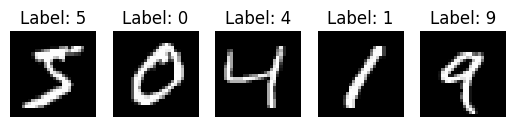

In [7]:
num_samples = 5
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Label: {}'.format(y_train[i]))
    plt.axis('off')
plt.show()


In [8]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')


In [9]:
X_train = X_train / 255
X_test = X_test / 255


In [10]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim=28*28, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer for binary classification


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X_train, y_train, epochs=10, batch_size=100)


Epoch 1/10
600/600 [==============================] - 4s 4ms/step - loss: 0.4406 - accuracy: 0.8751
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2061 - accuracy: 0.9399
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1577 - accuracy: 0.9532
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1301 - accuracy: 0.9614
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1119 - accuracy: 0.9660
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0987 - accuracy: 0.9704
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0878 - accuracy: 0.9735
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0795 - accuracy: 0.9759
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0726 - accuracy: 0.9777
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0644 - accuracy: 0.9807

In [13]:
scores = model.evaluate(X_test, y_test)
print('Accuracy:',scores[1]*100)


313/313 [==============================] - 1s 2ms/step - loss: 0.1149 - accuracy: 0.9648
Accuracy: 96.48000001907349


In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.1149 - accuracy: 0.9648
Test Loss: 0.1149313747882843
Test Accuracy: 0.9648000001907349


313/313 [==============================] - 1s 2ms/step
Predicted Value:  7
Successful prediction


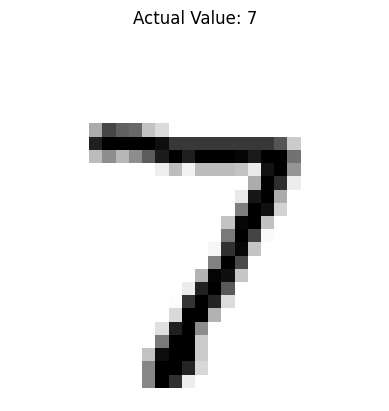

In [15]:
plt.imshow(X_test[0].reshape((28, 28)), cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[0]))
prediction = model.predict(X_test)
plt.axis("off")
print('Predicted Value: ', np.argmax(prediction[0]))
if y_test[0] == np.argmax(prediction[0]):
    print('Successful prediction')
else:
    print('Unsuccessful prediction')


In [16]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0


In [17]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

X_train, val_images, y_train, val_labels = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN architecture with dropout regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),  # Add dropout layer with dropout rate of 0.5
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [18]:
from tensorflow.keras import regularizers

# Example of adding L2 regularization to a layer
layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001))


In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
# Define hyperparameters for tuning
epochs = 10
batch_size = 128

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
375/375 [==============================] - 47s 119ms/step - loss: 1.8665 - accuracy: 0.3105 - val_loss: 0.5841 - val_accuracy: 0.8248
Epoch 2/10
375/375 [==============================] - 38s 102ms/step - loss: 0.5242 - accuracy: 0.8379 - val_loss: 0.3100 - val_accuracy: 0.9097
Epoch 3/10
375/375 [==============================] - 38s 101ms/step - loss: 0.3656 - accuracy: 0.8859 - val_loss: 0.2379 - val_accuracy: 0.9347
Epoch 4/10
375/375 [==============================] - 42s 112ms/step - loss: 0.3000 - accuracy: 0.9060 - val_loss: 0.1901 - val_accuracy: 0.9434
Epoch 5/10
375/375 [==============================] - 39s 104ms/step - loss: 0.2717 - accuracy: 0.9157 - val_loss: 0.1722 - val_accuracy: 0.9488
Epoch 6/10
375/375 [==============================] - 43s 114ms/step - loss: 0.2421 - accuracy: 0.9239 - val_loss: 0.1536 - val_accuracy: 0.9549
Epoch 7/10
375/375 [==============================] - 43s 115ms/step - loss: 0.2209 - accuracy: 0.9313 - val_loss: 0.1367 - val_ac

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Plot training and validation curves
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    

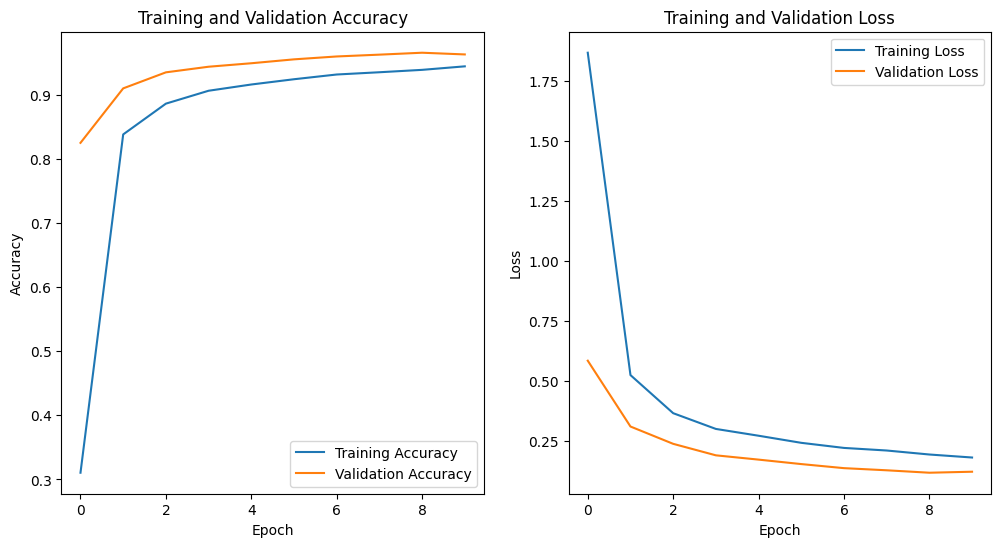

In [22]:
plot_training_history(history)


In [23]:
from sklearn.manifold import TSNE


def visualize_feature_space(model, X_test, y_test):
    intermediate_layer_model = models.Model(inputs=model.input,
                                             outputs=model.layers[-2].output)  # Use the output of the second last layer
    intermediate_output = intermediate_layer_model.predict(X_test)
    tsne = TSNE(n_components=2, random_state=42)
    tsne_output = tsne.fit_transform(intermediate_output)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=tsne_output[:, 0], y=tsne_output[:, 1], hue=y_test, palette='tab10', legend='full')
    plt.title('t-SNE Visualization of Feature Space')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()
    

313/313 [==============================] - 3s 9ms/step


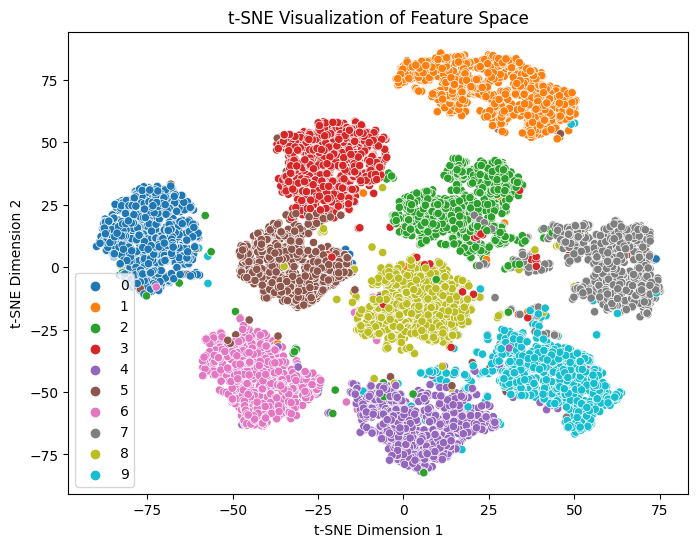

In [24]:
visualize_feature_space(model, X_test, y_test)
